# Finance using Random Forest

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# 1. Load the data:-

In [2]:
df=pd.read_csv(r'C:\Users\yashkundu\Downloads\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Understanding Data : -

# 2. View the raw data:-

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Dimension of the Data:-

In [4]:
df.shape

(284807, 31)

No. of Rows in Dataset is 284807 and No. of Columns in Dataset is 31

# 4. Data Types:-

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Null Values:-

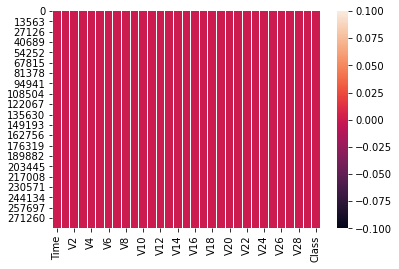

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis : -


# 6. Statistical Data Analysis:-

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 7. Response Variable Analysis:-

In [9]:
class_names = {0:'Not Fraud:', 1:'Fraud:'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud:    284315
Fraud:           492
Name: Class, dtype: int64


The majority of the transactions are Not Fraud. 

# 8. Train Test Split:-

In [10]:
y= df["Class"]
X = df.loc[:, df.columns != 'Class']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/3, random_state=42, stratify=y)

X Train is :-

In [11]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
69047,53244.0,1.239616,-0.899952,0.440585,-0.587725,-1.113024,-0.237229,-0.723593,0.069584,-0.497491,...,0.148049,-0.028444,-0.224935,-0.068355,0.008511,0.403109,-0.334358,-0.000849,0.013483,74.00
19498,30329.0,-0.813151,1.359829,1.346820,2.550308,0.949065,0.466341,0.661830,0.103189,-1.932522,...,0.004651,0.117034,0.218977,-0.409678,-0.297827,0.307527,0.363862,-0.201548,0.069149,3.71
215705,140185.0,-1.778866,-2.630909,-0.162263,-0.905025,-0.693729,0.808696,2.386610,-1.007339,-0.285506,...,0.130881,-0.351949,-0.094951,-0.064063,-0.880709,-0.151423,-0.277071,0.260784,-0.565981,721.72
277603,167744.0,2.102894,-0.798484,-1.747327,-0.660742,0.127615,0.160587,-0.385800,-0.074530,-0.532821,...,-0.484321,-0.028297,0.446965,-0.092346,-0.192627,0.299669,-0.017791,-0.000940,-0.058181,50.00
152305,97247.0,-0.961936,0.667170,0.150307,-0.693988,0.542616,-0.287350,0.392661,0.404596,1.195010,...,0.059251,0.133887,0.632171,-0.109675,0.769799,-0.056814,0.029876,0.224941,0.112810,49.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,2937.0,-0.415022,0.713439,1.221551,-2.108216,0.187067,-1.281616,1.118548,-0.345326,0.463473,...,0.075377,0.132886,0.756938,-0.290888,0.558730,0.037363,-0.871689,0.239482,-0.020422,1.00
233802,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
85418,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
29062,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42


X Test is:-

In [12]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
215048,139915.0,2.176456,-1.528522,-1.433919,-1.681750,-1.053366,-0.757959,-0.861033,-0.209905,-1.667228,...,-0.342089,0.151601,0.717609,-0.025625,-0.395559,0.025895,0.078794,-0.028473,-0.064036,80.00
282461,170913.0,-0.845884,-0.330806,-0.044769,-2.072992,1.480658,-1.341421,0.452037,-0.158185,-1.730347,...,0.364525,0.146769,0.087905,-0.103202,-0.572970,0.150608,-0.382606,0.055751,0.159270,40.00
121268,76130.0,-0.762819,1.312397,1.084885,0.366698,0.810306,-1.530318,1.047306,-0.215369,-0.806946,...,-0.017272,0.065609,0.150538,-0.277871,0.588722,0.311484,-0.503562,0.100503,0.152010,1.00
193504,130163.0,-3.533256,-0.853753,1.580658,-0.411751,-0.708256,0.542318,-0.861796,0.886444,1.698254,...,-0.509870,0.023474,0.689263,0.144167,0.674687,0.710543,0.180904,-0.836850,0.221657,12.63
158034,110822.0,1.972499,-0.220437,-0.167225,0.552944,-0.671355,-0.723213,-0.576733,-0.128663,2.698636,...,-0.314091,-0.263990,-0.417787,0.370467,-0.149542,-0.429515,-0.958658,0.029991,-0.033396,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62882,50465.0,-1.638703,0.889211,1.264046,0.073769,0.090113,-1.239684,0.506667,0.296909,-0.768885,...,0.002727,-0.446565,-1.456008,0.307718,0.324519,0.143817,-0.078503,0.016639,0.027874,20.40
112473,72661.0,1.228357,0.278820,0.183803,0.504163,-0.161282,-0.559862,-0.020214,-0.034628,-0.199431,...,-0.052909,-0.255381,-0.783247,0.073074,-0.037755,0.226973,0.096992,-0.028364,0.017966,5.99
280283,169429.0,1.951544,0.424459,-2.209354,1.593508,0.760917,-1.173650,0.686847,-0.340525,0.160307,...,-0.209784,-0.003285,0.114640,0.035559,0.953297,0.407834,-0.546459,-0.008554,-0.014634,34.79
232467,147182.0,1.913133,-0.717324,-0.344000,0.275969,-0.551489,0.604346,-1.049899,0.376629,1.293164,...,-0.156024,0.030635,0.035132,0.249086,0.061484,-0.522478,0.154862,-0.016097,-0.040644,40.53


Y Train is:-

In [13]:
y_train

69047     0
19498     0
215705    0
277603    0
152305    0
         ..
3441      0
233802    0
85418     0
29062     0
17677     0
Name: Class, Length: 189871, dtype: int64

Y Test is :-

In [14]:
y_test

215048    0
282461    0
121268    0
193504    0
158034    0
         ..
62882     0
112473    0
280283    0
232467    0
32933     0
Name: Class, Length: 94936, dtype: int64

# Data Modeling : -

# 9. Random Forest:-

In [15]:
#Initialize the Random Forest
model = RandomForestClassifier()
#Train the model using Training Dataset
model.fit(X_train, y_train)
# Prediction using test data
y_pred = model.predict(X_test)
# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )

print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  99.95


# Confusion Matrix : -

# 10. Confusion Matrix:-

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94766,     6],
       [   39,   125]], dtype=int64)

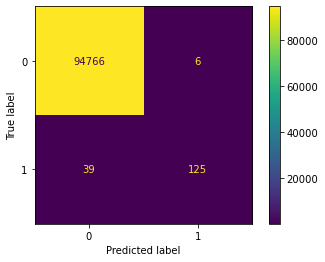

In [17]:
plot_confusion_matrix(model, X_test, y_test)

# Summary:-

1. First we import all the libraries that we use in this project.

2. Then, we load the given data.

3. After that we understand the data using following terms:-

  a) View the raw data with the help of .head() function which shows the first five columns of the data.
   
  b) Dimension of the data with the help of .shape function which gives the no. of columns and rows in the given dataset.
  
  c) Data types of the data with the help of .info() function which gives the whole information of the dataset.
  
  d) Null values of the data with the help of .isnull() function which shows the null value in the given dataset.
  
4. After that we do EDA(Exploratory Data Analysis) which consist the following terms:-

  a) Statistical data analysis with the help of .describe() function which gives count,mean,std,min etc.
 
  b) Response variable analysis which gives the sum of "Fraud" and "Not Fraud".From this we analyse "The majority of the transactions are Not Fraud."
 
  c) Train test split in this before fitting the data into the machine learning model, we should split the data into training data and testing data. This is an important step because we would like to train the model by fitting the training data. But to test the data, we should use the data that is new to the model. Then only we would be able to calculate the performance of the model on the unseen data.
  
5. After that we model the data with the help of Random Forest which gives 99.96% accuracy.

6. At last we create the confusion matrix for "Random Forest" model.